In [1]:
# the training dataset is at: http://vis-www.cs.umass.edu/lfw/

In [2]:
# Step 1:
# download source dataset in the websit and extract it
# run data_generater.ps1 in windows powershell to generte and rename the images
# totallly, we have 1054 images

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as Image
from sklearn.cluster import KMeans
import numpy as np
import random

(250, 250, 3)


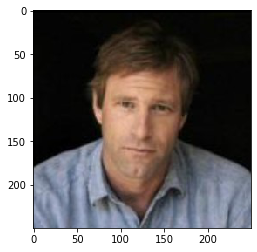

In [4]:
# load image and show
img=Image.imread('./dataset/0.jpg')
print(img.shape)
plt.imshow(img)
plt.show()

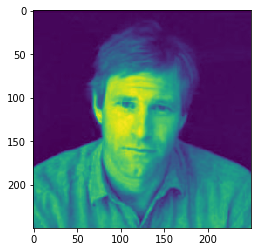

In [5]:
# show one channel of this image
plt.imshow(img[:,:,0])
plt.show()

In [6]:
# Step 2:
# prepare the training dataset
# in order to reduce the size of the image, we just take the first channel to train
dataset = []
for i in range(1054):
    filename = './dataset/' + str(i) + ".jpg"
    img=Image.imread(filename)
    dataset.append(img[:,:,0].reshape(-1))
print(len(dataset))

1054


In [7]:
# Step 3:
# find kmean cluster
# first let K=10

In [8]:
K = 10
kmeans = KMeans(n_clusters=K).fit(dataset)
centroids = kmeans.cluster_centers_

The mean distance is:  3513.893794978911


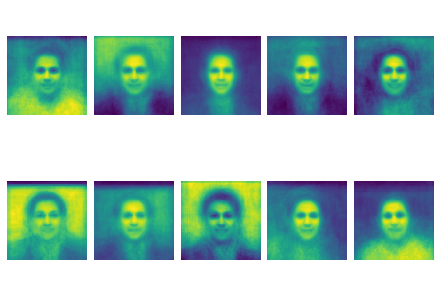

In [9]:
fig, axs = plt.subplots(2, 5, constrained_layout=True)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(centroids[i].reshape(250,250))
    plt.axis(False)
print("The mean distance is: ", kmeans.inertia_/1054/250/250)

In [10]:
# train 1-20 cluster, this will take some time, so we will sample the data
centroids = []
distances = []
sample_dataset = random.sample(dataset, 100)
for i in range(1, 20+1):
    kmeans = KMeans(n_clusters=i).fit(sample_dataset)
    centroids.append(kmeans.cluster_centers_)
    distances.append(kmeans.inertia_/1054/250/250)

the distances are:


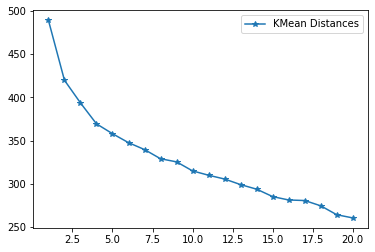

In [11]:
print("the distances are:")
plt.plot(range(1, 20+1), distances, marker='*', label="KMean Distances")
plt.legend()
plt.draw()

The mean distance is:  260.6638665810667


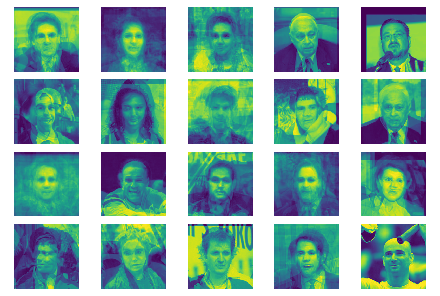

In [12]:
# display 20 clusters
centroids20 = centroids[19]
distance20 = distances[19]
fig, axs = plt.subplots(4, 5, constrained_layout=True)
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(centroids20[i].reshape(250,250))
    plt.axis(False)
print("The mean distance is: ", distance20)